In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("df_total_ibge.csv")

In [3]:
df.shape

(17596578, 29)

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

faixa_remuneracao_media_sm  sexo_cod  ibge_setor_Adm Técnica Profissional  \
0                           0         1                                    0   
1                           1         0                                    0   
2                           1         0                                    0   
3                           1         0                                    0   
4                           1         1                                    0   

   ibge_setor_Administração Pública  ibge_setor_Agricultura  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   

   ibge_setor_Alimentos e Bebidas  ibge_setor_Aloj Comunic  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   

   ibge_setor_Borracha, Fumo, Couros  ibge_setor_Comércio Atacadista  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   ibge_setor_Comércio Varejista  ...  ibge_setor_Indústria Têxtil  \
0                              0  ...                            0   
1                              0  ...                            0   
2                              0  ...                            0   
3                              0  ...                            0   
4                              0  ...                            0   

   ibge_setor_Instituição Financeira  ibge_setor_Madeira e Mobiliário  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   ibge_setor_Material de Transporte  ibge_setor_Médicos Odontológicos Vet  \
0                                  0                                     0   
1                                  0                                     0   
2                                  0                                     0   
3                                  0                                     0   
4                                  0                                     0   

   ibge_setor_Papel e Gráf  ibge_setor_Prod. Mineral Não Metálico  \
0                        0                                      0   
1                        0                                      0   
2                        0                                      0   
3                        0                                      0   
4                        0                                      0   

   ibge_setor_Serviço Utilidade Pública  ibge_setor_Transporte e Comunicações  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   random_faixa  
0           317  
1          1384  
2          1016  
3          1395  
4          1325 

In [6]:
df_menor = df[df["faixa_remuneracao_media_sm"]==0]

df_0 = df[df["faixa_remuneracao_media_sm"].isin([1, 2, 3])]
df_1 = df[df["faixa_remuneracao_media_sm"].isin([8, 9, 10])]

df_maior = df[df["faixa_remuneracao_media_sm"]==11]


In [4]:
df_logistica =  df[df["faixa_remuneracao_media_sm"].isin([0,11])]
df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_75757/1279625075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logistica['faixa_remuneracao_media_sm'] = df_logistica['faixa_remuneracao_media_sm'].replace({0: 0, 11: 1})


In [8]:
df_logistica.columns

Index(['faixa_remuneracao_media_sm', 'sexo_cod',
       'ibge_setor_Adm Técnica Profissional',
       'ibge_setor_Administração Pública', 'ibge_setor_Agricultura',
       'ibge_setor_Alimentos e Bebidas', 'ibge_setor_Aloj Comunic',
       'ibge_setor_Borracha, Fumo, Couros', 'ibge_setor_Comércio Atacadista',
       'ibge_setor_Comércio Varejista', 'ibge_setor_Construção Civil',
       'ibge_setor_Elétrico e Comunic', 'ibge_setor_Ensino',
       'ibge_setor_Extrativa Mineral', 'ibge_setor_Indústria Calçados',
       'ibge_setor_Indústria Mecânica', 'ibge_setor_Indústria Metalúrgica',
       'ibge_setor_Indústria Química', 'ibge_setor_Indústria Têxtil',
       'ibge_setor_Instituição Financeira', 'ibge_setor_Madeira e Mobiliário',
       'ibge_setor_Material de Transporte',
       'ibge_setor_Médicos Odontológicos Vet', 'ibge_setor_Papel e Gráf',
       'ibge_setor_Prod. Mineral Não Metálico',
       'ibge_setor_Serviço Utilidade Pública',
       'ibge_setor_Transporte e Comunicações', '

In [ ]:
to refazendo a analises para outras bases, vou te enviando o resultado e vc monta um textinho explicativo para o resultado?

aqui eu rodei assim: 

In [10]:
#nao ta rodando a logistica pode ser multicolineriaridade entao eu vou rodar um modelo para selecionar as variaveis mais importantes


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preparando os dados
X = df_logistica.drop(['faixa_remuneracao_media_sm'], axis=1)
y = df_logistica['faixa_remuneracao_media_sm']

# É importante padronizar as características para regressão Lasso
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Ajustando o modelo Lasso
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train, y_train)

# Coeficientes do modelo
coef = pd.DataFrame(zip(X.columns, lasso_model.coef_[0]), columns=['Feature', 'Coefficient'])
print(coef[coef['Coefficient'] != 0])  # Mostrar apenas características com coeficientes não-zero


                                 Feature  Coefficient
0                               sexo_cod     0.147507
2       ibge_setor_Administração Pública     0.124772
5                ibge_setor_Aloj Comunic    -0.274536
8          ibge_setor_Comércio Varejista    -0.169140
9            ibge_setor_Construção Civil    -0.074954
11                     ibge_setor_Ensino    -0.106257
17           ibge_setor_Indústria Têxtil    -0.015036
18     ibge_setor_Instituição Financeira     0.095947
25  ibge_setor_Transporte e Comunicações    -0.016646
26                          random_faixa    15.859060


In [11]:
import statsmodels.api as sm

X = df_logistica[['sexo_cod',"ibge_setor_Administração Pública","ibge_setor_Aloj Comunic",
                  "ibge_setor_Comércio Varejista","ibge_setor_Construção Civil","ibge_setor_Ensino",
                  "ibge_setor_Indústria Têxtil","ibge_setor_Instituição Financeira","ibge_setor_Transporte e Comunicações",
                  "ibge_setor_Médicos Odontológicos Vet"]]  
X = sm.add_constant(X)  
y = df_logistica['faixa_remuneracao_media_sm']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.353393
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     faixa_remuneracao_media_sm   No. Observations:               477926
Model:                                  Logit   Df Residuals:                   477915
Method:                                   MLE   Df Model:                           10
Date:                        Mon, 13 May 2024   Pseudo R-squ.:                  0.2528
Time:                                18:07:59   Log-Likelihood:            -1.6890e+05
converged:                               True   LL-Null:                   -2.2603e+05
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Análise dos Coeficientes
const: O coeficiente para o intercepto é 1.1636, sugerindo a log-odds da faixa de remuneração ser a mais alta quando todas as outras variáveis são zero.
sexo_cod: Com um coeficiente de 1.0867, esta variável mostra um forte efeito positivo na probabilidade de uma faixa de remuneração mais alta, significativamente estatístico (p < 0.000). Isto sugere que o aumento no valor de sexo_cod (possivelmente indicando o sexo feminino, dependendo da codificação) está associado a um aumento nas chances de estar na faixa de remuneração mais alta.
Setores de Atividade (IBGE):
Setores Positivamente Correlacionados:
ibge_setor_Administração Pública e ibge_setor_Instituição Financeira apresentam coeficientes positivos substanciais (0.8879 e 2.2606, respectivamente), indicando que trabalhar nesses setores está associado a uma maior probabilidade de estar em faixas de remuneração mais altas.
Setores Negativamente Correlacionados:
Variáveis como ibge_setor_Aloj Comunic, ibge_setor_Comércio Varejista, e ibge_setor_Indústria Têxtil têm coeficientes negativos significativos, mostrando uma associação com menores chances de estar na faixa de remuneração mais alta.
Implicações e Considerações
Impacto do Gênero: O forte impacto positivo de sexo_cod pode indicar questões de equidade de gênero que requerem atenção adicional, dependendo de como a variável foi codificada e interpretada no contexto dos dados.
Influência do Setor de Atividade: O setor de atividade mostra ser um determinante significativo da faixa de remuneração, com setores financeiros e de administração pública oferecendo melhores remunerações em comparação com setores como comércio varejista e indústria têxtil.
Políticas de Remuneração: Os resultados podem ser úteis para as organizações na revisão de suas políticas salariais e práticas de equidade, especialmente considerando o impacto significativo dos setores de atividade e gênero na remuneração.


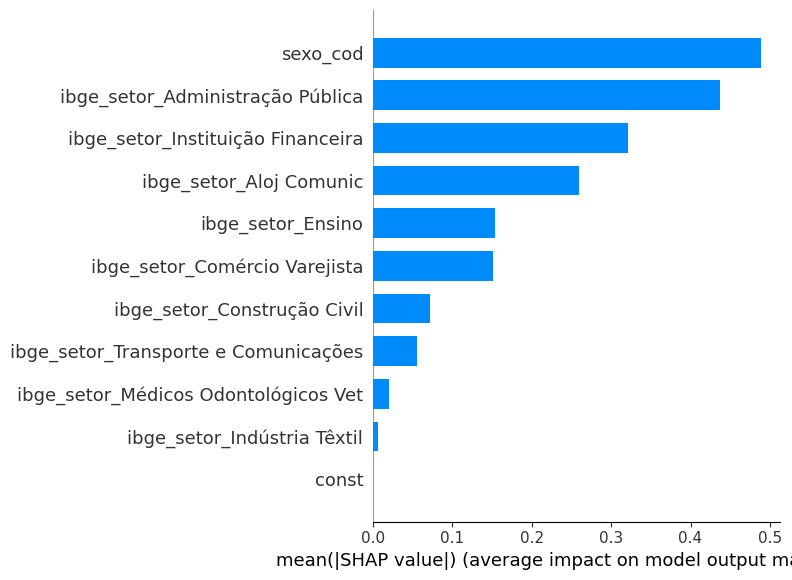

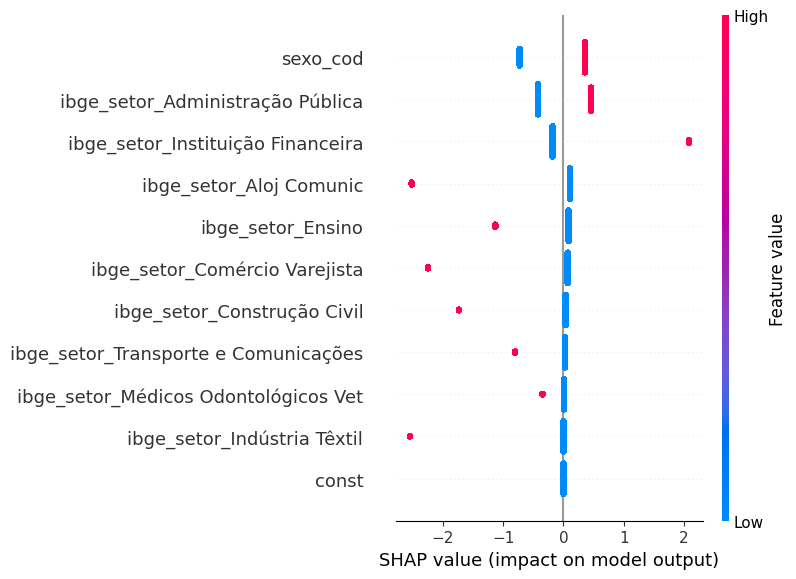

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Supondo que df_logistica é seu DataFrame e X e y já estão definidos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criação do modelo de regressão logística
model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


Agora vou rodar a logistica deixando como variavel y o sexo cod e colocando todas as outras como dependentes para ver qual explica melhor

LinearExplainer explainer: 5278975it [00:29, 106366.09it/s]                             


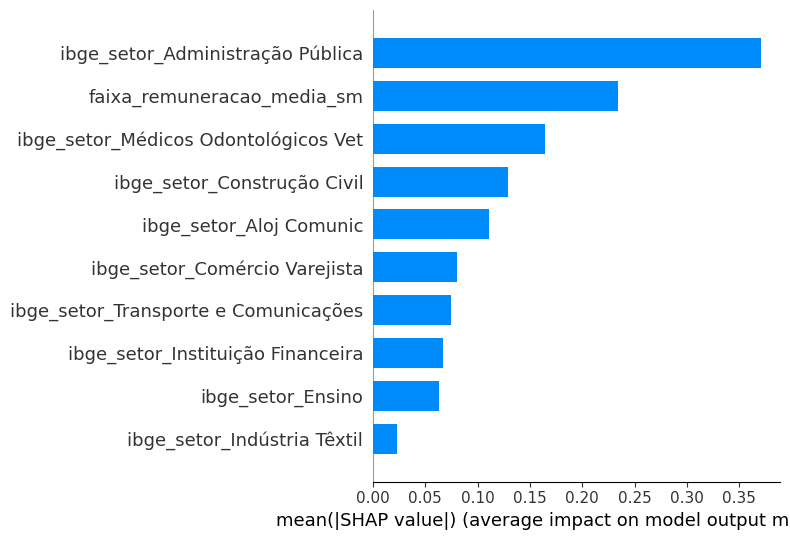

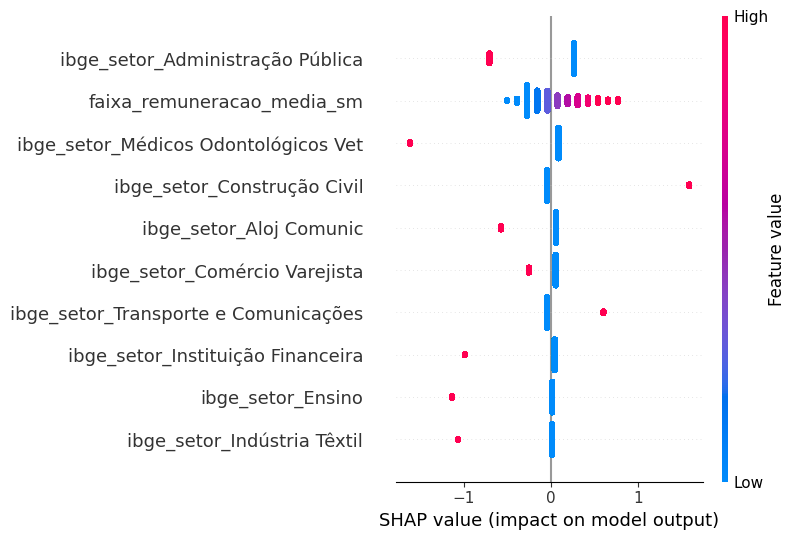

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['faixa_remuneracao_media_sm', "ibge_setor_Administração Pública","ibge_setor_Aloj Comunic",
        "ibge_setor_Comércio Varejista","ibge_setor_Construção Civil","ibge_setor_Ensino","ibge_setor_Indústria Têxtil",
        "ibge_setor_Instituição Financeira","ibge_setor_Transporte e Comunicações","ibge_setor_Médicos Odontológicos Vet"]]  
y= df['sexo_cod']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model_sklearn = LogisticRegression(max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Usando SHAP
import shap

explainer = shap.Explainer(model_sklearn, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)


In [5]:
import statsmodels.api as sm

X = df_logistica[['faixa_remuneracao_media_sm',"ibge_setor_Administração Pública","ibge_setor_Aloj Comunic",
                  "ibge_setor_Comércio Varejista","ibge_setor_Construção Civil","ibge_setor_Ensino",
                  "ibge_setor_Indústria Têxtil","ibge_setor_Instituição Financeira","ibge_setor_Transporte e Comunicações",
                  "ibge_setor_Médicos Odontológicos Vet"]]  
X = sm.add_constant(X)  
y = df_logistica['sexo_cod']

# Criando o modelo de regressão logística
model = sm.Logit(y, X)

# Ajustando o modelo
result = model.fit()

# Mostrando os resultados
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.622959
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               sexo_cod   No. Observations:               477926
Model:                          Logit   Df Residuals:                   477915
Method:                           MLE   Df Model:                           10
Date:                Tue, 28 May 2024   Pseudo R-squ.:                 0.04307
Time:                        22:22:32   Log-Likelihood:            -2.9773e+05
converged:                       True   LL-Null:                   -3.1113e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.0656      0.0